In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/Hackathon_Assignment/Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Checking the dimension (Rows and Columns) of the dataset

In [3]:
df.shape

(8523, 12)

### Summary of numerical Columns of the dataset

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Summery of Categorical Columns of the dataset

In [5]:
df.describe(include = 'O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Exploration
##### Below are the steps involved to understand, clean and prepare your data for building your predictive model:

* Missing values treatment
* Variable Identification
* Outlier treatment
* Univariate Analysis
* Bi-variate Analysis
* Variable transformation
* Variable creation

### Missing Values

In [7]:
### Checking Null Values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Checking the percentages of missing values
df.isnull().sum().sort_values(ascending=False)/df.shape[0] * 100

Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### Insights:

* Item_Weight and Outlet_Size Column contains null values.

### Handling the null values of the column Item_Weight

In [9]:
df.Item_Weight.mean()

12.857645184136183

In [10]:
df['Item_Weight'].fillna(df.Item_Weight.mean(), inplace = True)
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [11]:
df.Item_Weight.isnull().sum()

0

### Handling the null values of the column Outlet_Size

In [12]:
df.Outlet_Size.mode().iloc[0]

'Medium'

In [13]:
df['Outlet_Size'].fillna(df.Outlet_Size.mode().iloc[0], inplace = True)

In [14]:
df.Outlet_Size.isnull().sum()

0

In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Now, NA values are not present.

### Variable Identification

In [17]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [18]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O


* Item_Fat_Content: We have reapted values in , lets replace them.
* Item_Type: We have categories of items, that can be shrink.

In [19]:
# # Replace reapted values in Item_Fat_Content
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
df['Item_Fat_Content'].replace(('low fat', 'LF', 'reg'),('Low Fat', 'Low Fat', 'Regular'), inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

* Combine Item_Type, as we have 16 catgories, but when you see Item_identifier ID, It has first two charachters defining the item type, these are FD, DR, NC means food, Drinks, Non-Consumables. lets convert Item_Type into these 3 categories

In [21]:
# Combine Item_Type, and create new category
df['Item_Type_Combined'] = df.Item_Identifier.apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable']) 
df.Item_Type_Combined.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

We have Store Types, type2 and Type3, we can combine them, but is it good? lets check their sales, if both have opprox similier sales, we can combine them.

In [22]:
df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


There is a huge difference in sales, so not good idea to combine them.

In [23]:
# Lets deal with Numerical Data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* Item_Visibility: it has min 0 value, which makes no sense.
* Outlet_Establishment_Year: Its better to address how old store is.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

### Outliers

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

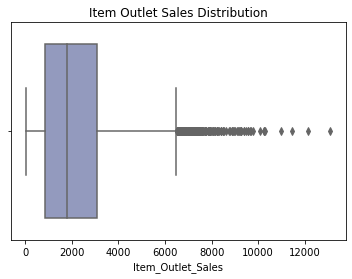

In [25]:
#Box plot for Item_Outlet_Sales to see outliers
sns.boxplot(x=df['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [26]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
df = df[(df['Item_Outlet_Sales'] > lower) & (df['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

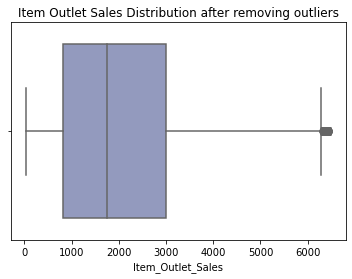

In [27]:
# Item_Outlet_Sales after removing Outliers
sns.boxplot(x=df['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

In [28]:
# change Establishment_Year to Outlet_Age
print(df.Outlet_Establishment_Year.unique())
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,11
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,22


Data is now clean and let jump into visualization.

## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

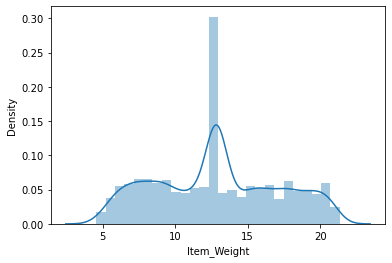

In [30]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

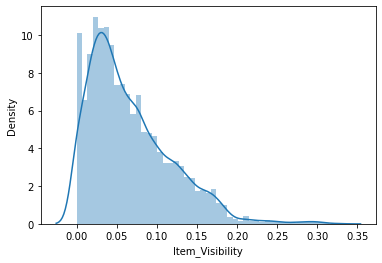

In [31]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

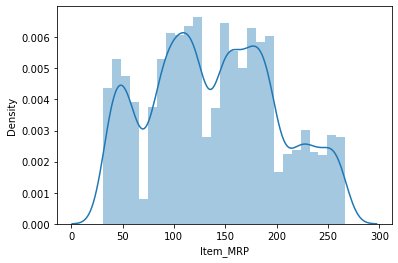

In [32]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

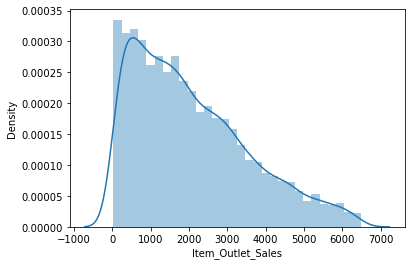

In [33]:
sns.distplot(df['Item_Outlet_Sales'])

* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakdness.

In [34]:
print('Skewness: %f' % df['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %df['Item_Outlet_Sales'].kurt())

Skewness: 0.780104
Kurtsis: -0.119136


In [35]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

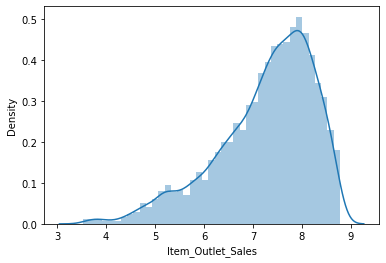

In [36]:
sns.distplot(df['Item_Outlet_Sales'])

## Univariate Plots

#### lets look at the countplots for categorial data

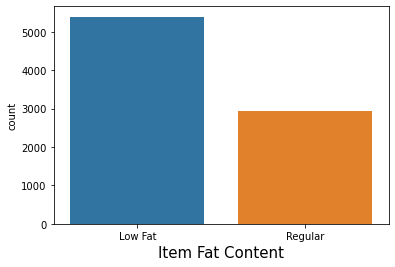

In [37]:
# Categorial Data
['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

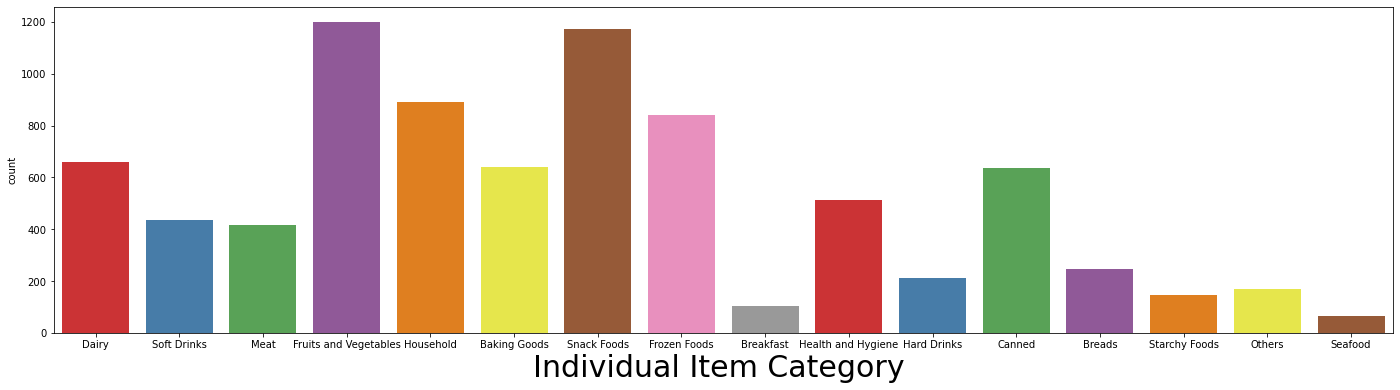

In [38]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

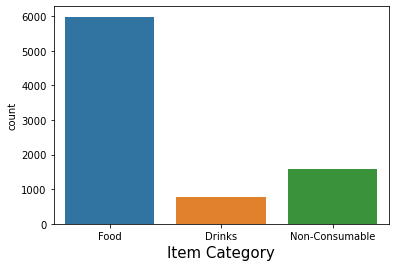

In [39]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

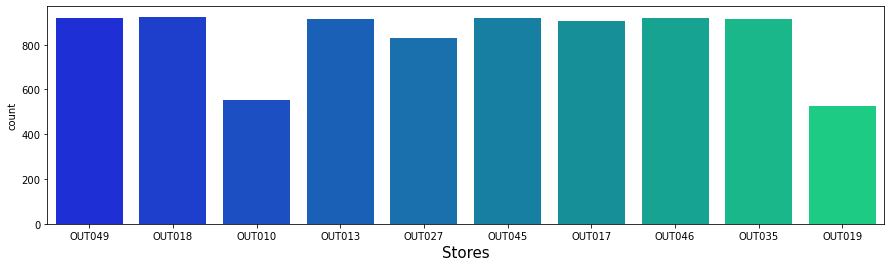

In [40]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

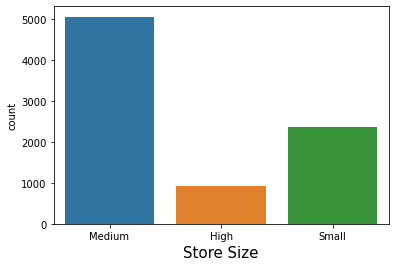

In [41]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

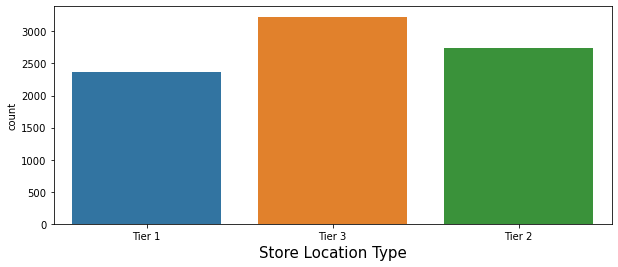

In [42]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

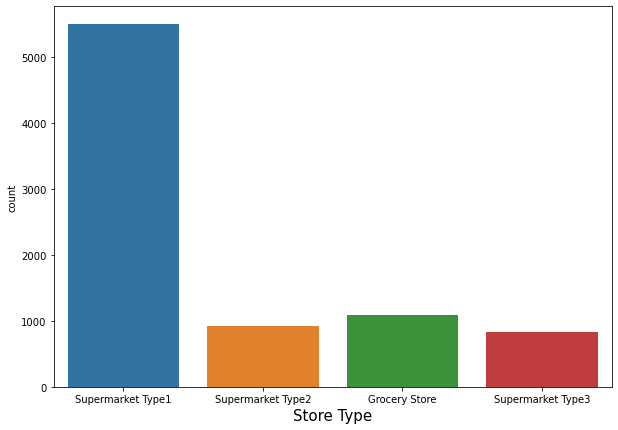

In [43]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

### Insights
* Item_Fat_Content: Most Items sold are low Fat.
* Item_Type: Distictly fruits & veg, snacks food are popular.
* Item_Type_Combined: Most Sold Item cateogory is food.
* Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT010 and OUT019.
* Outlet_Size: Bigmart Stores are mostly in medium size in this data.
* Outlet_Location_Type: Most comon type of location is Tier3
* Outlet_Type: By a wide mergin Most Store Types are SuperMarket Type1.

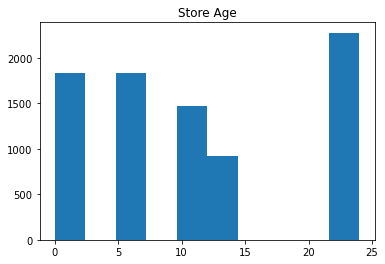

In [44]:
# For Numerical Data

# HistPlot for Outlet_Age
plt.hist(x=df['Outlet_Years'])
plt.title('Store Age')
plt.show()

### Insights
* Outlet_Age: Most Common Outlets are 35 year's old.

### Bivariate plots For Numeric.
Let's check following relationships

* Sales per Item_Visibility
* Sales per Item_Weight
* Sales per Item_MRP

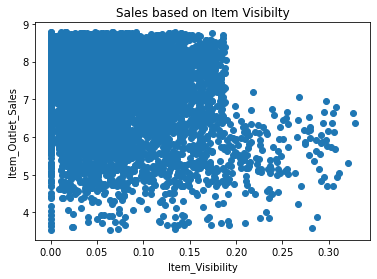

In [45]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

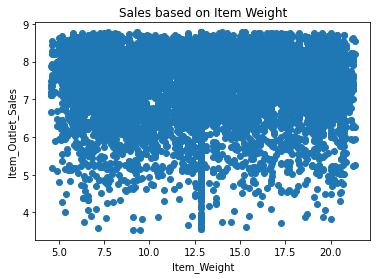

In [46]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

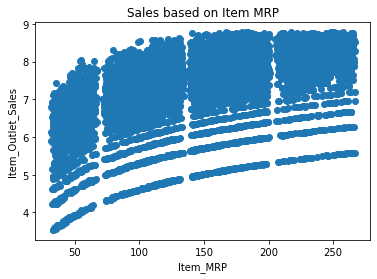

In [47]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

### Insights:
* Item_Visibility: Looks like it has negative correlation.
* Item_Weight: Not a particular Pattern, Data is very spreaded.
* Item_MRP: Items with higer MRP Sales tends to sell better.

## Bivariate plots For Categorical.
Let's check following relationships

* Sales per Outlet_Type
* Sales per Item_Type_Combined
* Sales per Outlet_Identifier
* Sales per Outlet_Size
* Sales per Outlet_Location_Type

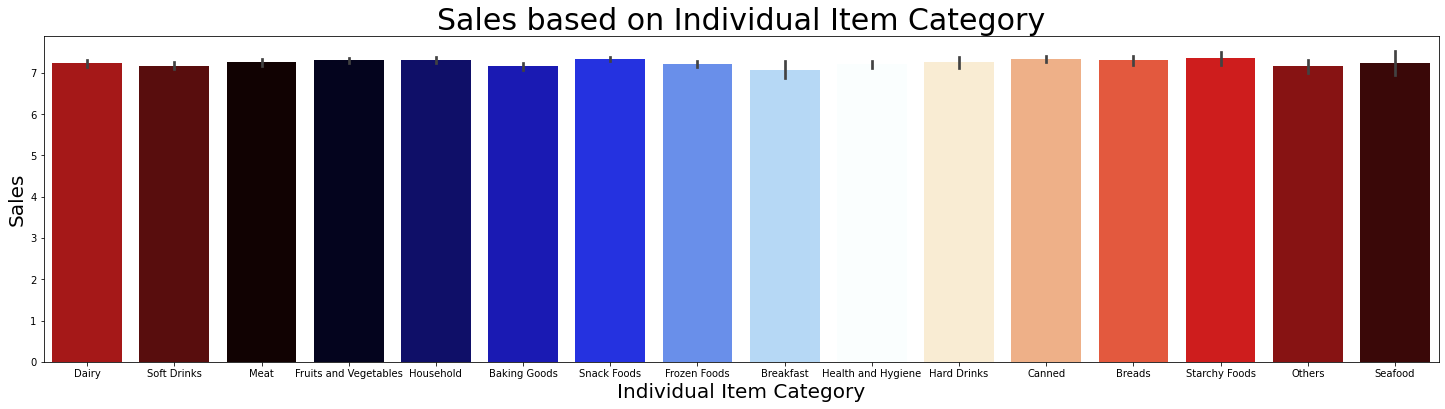

In [48]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=df,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.show()

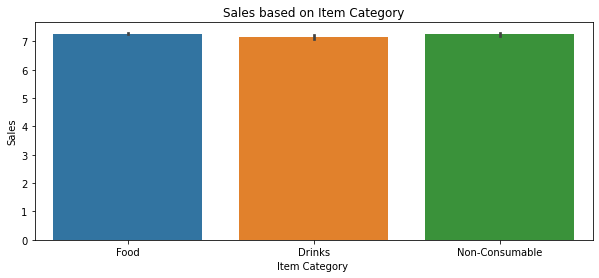

In [49]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.show()

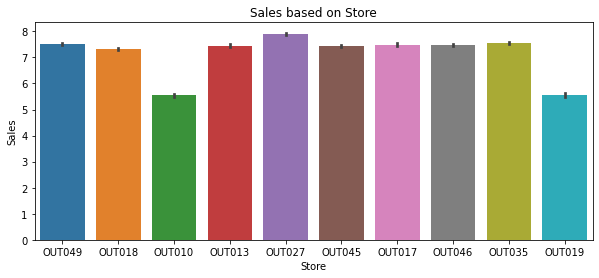

In [50]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

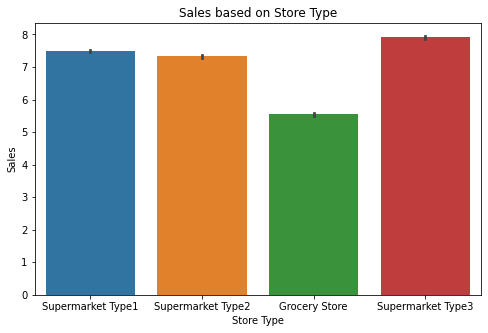

In [51]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

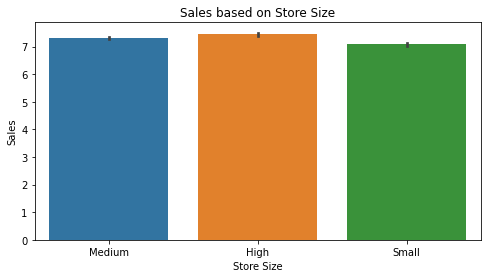

In [52]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.show()

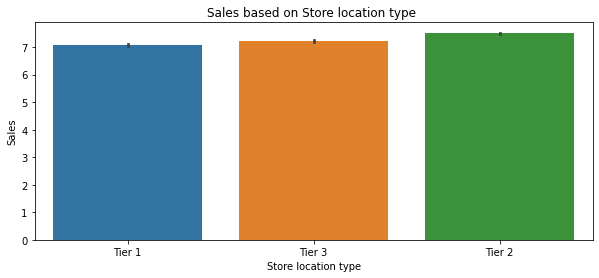

In [53]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.show()

### Insights:

* Item_Type_Combined: Based on Categories, Food has most Sells, But difference is very small.
* Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
* Outlet_Type: Most Sells are through SuperMarket Type3 surprisingly not Type1.
* Outlet_Size: Sells are mostly even in Medium and High size Stores.
* Outlet_Location_Type: Most sells are through Tier2, but difference with Tier1 and Tier2 is very small.

### Multivariate plots.

Let's check following data

* Outlet Type in all Outlet location based on sales.
* Sales of Item_Type based on Outlet_Type.
* Outlet_Location_Type of Outlet_Type based on sales.
* Sales of Outlet_Location_Type based on Item_Type_Combined.

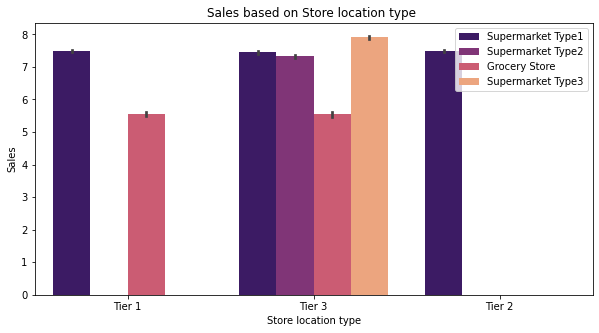

In [54]:
# Outlet Type in all Outlet location based on sales
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

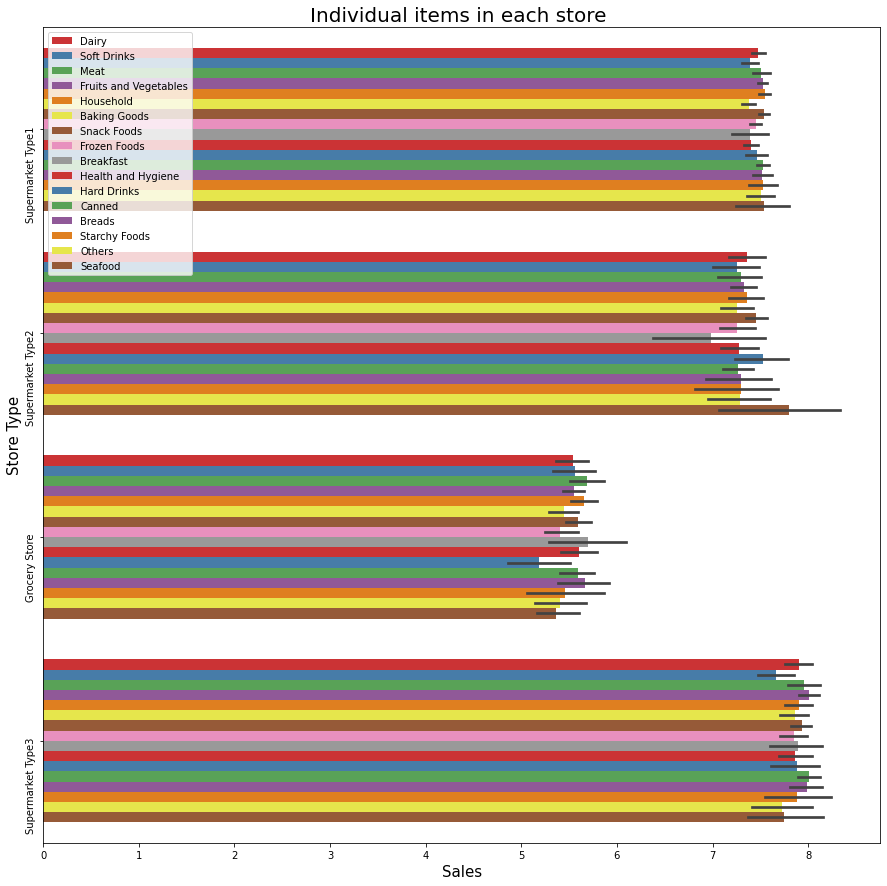

In [55]:
# Sales of Item_Type based on Outlet_Type.
plt.figure(figsize=(15,15))
sns.barplot(data=df,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

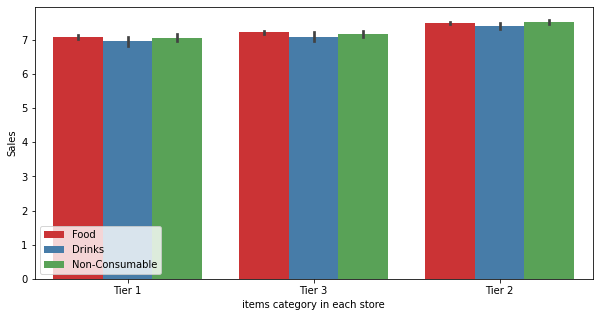

In [56]:
# Sales of Outlet_Location_Type based on Item_Type_Combined.
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

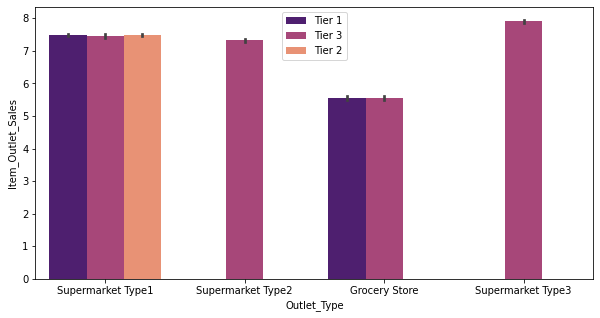

In [57]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type','Item_Outlet_Sales',hue='Outlet_Location_Type',data=df, palette='magma')
plt.legend()

### Insights:
* Seafood is the most item_type sold in SuperMarket 2, Grocery store has less sales.
* Only Teir3 has all Outlet_Type, and SuperMarket type3 has most sales.
* Outlet_Location_Type has almost equal sales based on Item_Type_combined.
* Supermarket Type 1 outlet is present all the Outlet_Location.

## Correlation Matrix

<AxesSubplot:>

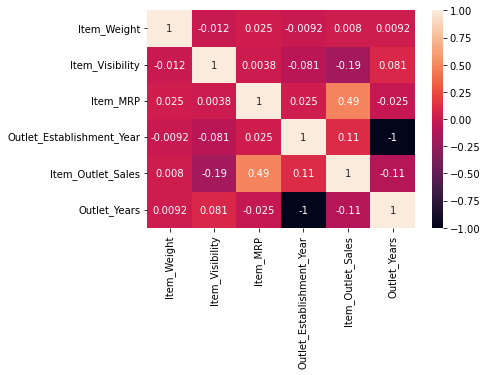

In [58]:
# Correlation Matrix
plt.Figure(figsize=(20,5))
sns.heatmap(df.corr(), annot=True)

### Insights:

* We can see Item_Outlet_Sales is highly correlated with Item_MRP.
* We can see Outlet_Age and Item_Visibility are negativaly correlated.
* Item_Weight and Outlet_Eastablishment_Year is also positive correlated.

### Data Preprocessing

## Future Engneering
We have 7 categorial columns

Ordinal Data:

* Item_Fat_Content
* Outlet_Size
* Outlet_Location_Type 

Nominal Data:

* Item_Identifier
* Item_Type
* Outlet_Identifier
* Outlet_Type

In [59]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,0


In [60]:
# Droping the columns
df = df.drop(['Item_Identifier', 'Item_Type'], axis = 1)

In [61]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,10
1,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,0
2,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,10
3,19.20,Regular,0.000000,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664,Food,11
4,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,22


In [62]:
# Categorical Columns
df.select_dtypes(include = 'object').head()

,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,Regular,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,Regular,OUT010,Medium,Tier 3,Grocery Store,Food
4,Low Fat,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable


In [63]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Item_Fat_Content: ['Low Fat' 'Regular']
Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size: ['Medium' 'High' 'Small']
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Item_Type_Combined: ['Food' 'Drinks' 'Non-Consumable']


## Label Encoding

In [64]:
#Label Encoding for Ordinal Data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

label = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined']
for i in label:
    df[i] = le.fit_transform(df[i])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.30,0,0.016047,249.8092,9,1999,1,0,1,8.225808,1,10
1,5.92,1,0.019278,48.2692,3,2009,1,2,2,6.096776,0,0
2,17.50,0,0.016760,141.6180,9,1999,1,0,1,7.648868,1,10
3,19.20,1,0.000000,182.0950,0,1998,1,2,0,6.597664,1,11
4,8.93,0,0.000000,53.8614,1,1987,0,2,1,6.903451,2,22


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8337 non-null   float64
 1   Item_Fat_Content           8337 non-null   int32  
 2   Item_Visibility            8337 non-null   float64
 3   Item_MRP                   8337 non-null   float64
 4   Outlet_Identifier          8337 non-null   int32  
 5   Outlet_Establishment_Year  8337 non-null   int64  
 6   Outlet_Size                8337 non-null   int32  
 7   Outlet_Location_Type       8337 non-null   int32  
 8   Outlet_Type                8337 non-null   int32  
 9   Item_Outlet_Sales          8337 non-null   float64
 10  Item_Type_Combined         8337 non-null   int32  
 11  Outlet_Years               8337 non-null   int64  
dtypes: float64(4), int32(6), int64(2)
memory usage: 909.4 KB


### Checking unique values in our dataset for better understanding

In [66]:
df.nunique()

Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7715
Item_MRP                     5832
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3322
Item_Type_Combined              3
Outlet_Years                    9
dtype: int64

### Regression Models
1. Linear Regression
2. Lasso Regressor
3. Ridge Regression
4. Decision Tree Regressor
5. Random Forest Regressor
6. XGBoost Regressor
7. Extra Tree Regressor
8. AdaBoost Regressor
9. Support Vector Regressor
10. KNN Regressor

### Machine Learning Model Building

In [67]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [68]:
X.shape, y.shape

((8337, 11), (8337,))

### Splitting the dataset into Train Test Split

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [70]:
X_train.shape, X_test.shape

((6669, 11), (1668, 11))

In [71]:
y_train.shape, y_test.shape

((6669,), (1668,))

In [72]:
print(y_test)

8491    8.478606
2377    8.545257
526     5.651193
8056    7.457463
1689    7.017102
          ...   
4033    7.479880
7204    8.573344
4541    7.652669
6019    5.995983
5902    7.085159
Name: Item_Outlet_Sales, Length: 1668, dtype: float64


### Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
print(X_train)

[[-1.08947871  1.3605949  -0.53763591 ...  1.05400329 -0.1755217
  -1.33784648]
 [ 1.5517471  -0.73497262 -1.00006641 ... -0.22565226  1.74027902
  -0.49868374]
 [ 0.0542664  -0.73497262 -0.79853159 ... -0.22565226  1.74027902
  -1.0980857 ]
 ...
 [ 1.71682371 -0.73497262 -0.03613781 ... -0.22565226 -0.1755217
  -0.13904256]
 [ 1.75219727 -0.73497262  1.46141359 ...  1.05400329 -0.1755217
  -1.33784648]
 [ 1.71682371 -0.73497262  0.64469703 ... -0.22565226  1.74027902
  -0.73844452]]


In [75]:
print(X_test)

[[-0.59542799  1.3605949  -0.56327047 ...  1.05400329 -0.1755217
  -1.33784648]
 [-0.13439259  1.3605949  -0.62615455 ... -0.22565226 -0.1755217
   0.10071822]
 [-1.01873159 -0.73497262 -0.64549486 ...  1.05400329  1.74027902
  -1.33784648]
 ...
 [-0.2169309  -0.73497262  0.17980783 ... -0.22565226 -0.1755217
  -0.49868374]
 [-0.01467781  1.3605949  -0.90686414 ... -1.50530781 -0.1755217
   1.53928293]
 [-0.54708412 -0.73497262 -0.59588003 ...  1.05400329  1.74027902
  -1.33784648]]


### Linear Regression Model

### Define the Model

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr=LinearRegression()
lr

LinearRegression()

### Fit the model

In [77]:
lr.fit(X_train,y_train)

LinearRegression()

### Predict the test Data

In [78]:
y_pred=lr.predict(X_test)

In [79]:
y_pred

array([8.49896884, 7.76927787, 7.78453421, ..., 7.34440119, 5.52903166,
       7.34699429])

In [80]:
y_test

8491    8.478606
2377    8.545257
526     5.651193
8056    7.457463
1689    7.017102
          ...   
4033    7.479880
7204    8.573344
4541    7.652669
6019    5.995983
5902    7.085159
Name: Item_Outlet_Sales, Length: 1668, dtype: float64

### Check the cost functions with respect to predictions

In [81]:
from sklearn.metrics import  r2_score, mean_squared_error,mean_absolute_error

In [82]:
print('MSE : ', mean_squared_error(y_test,y_pred))
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2 score:', r2_score(y_test,y_pred))

MSE :  0.41050821680019534
MAE :  0.5080795049122948
RMSE :  0.6407091514877834
r2 score: 0.5875888073593803


In [83]:
lr.coef_

array([-0.00113882,  0.00946127, -0.05947323,  0.49979186,  0.19342197,
        0.07674801, -0.27137106, -0.19631408,  0.49605131,  0.00488579,
       -0.07674801])

In [84]:
lr.intercept_

7.256449181136861

<AxesSubplot:title={'center':'Model Coefficients'}>

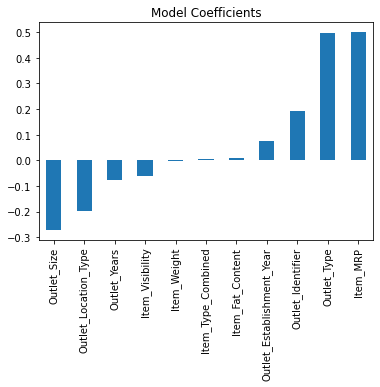

In [85]:
# Checking the important features
coef = pd.Series(lr.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

### Lasso Regression

In [86]:
model = Lasso(alpha = 0.05)

model.fit(X_train,y_train)

y_pred= model.predict(X_test)

In [87]:
y_pred

array([8.3263044 , 7.70057382, 7.69580017, ..., 7.3267777 , 5.77448093,
       7.30620082])

In [88]:
print('MSE : ', mean_squared_error(y_test,y_pred))
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2 score:', r2_score(y_test,y_pred))

MSE :  0.4354477820756711
MAE :  0.517624896515223
RMSE :  0.6598846733147172
r2 score: 0.5625336307800436


In [89]:
model.coef_, model.intercept_

(array([ 0.        ,  0.        , -0.03790568,  0.44644102,  0.23409581,
         0.02711618, -0.13048256, -0.        ,  0.37733368,  0.        ,
        -0.0537325 ]),
 7.25644918113686)

<AxesSubplot:title={'center':'Model Coefficients'}>

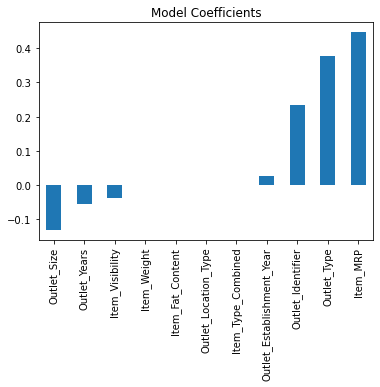

In [90]:
# Checking the important features
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

### Ridge Regression

In [91]:
rr = Ridge()

rr.fit(X_train,y_train)

y_pred= rr.predict(X_test)

In [92]:
y_pred

array([8.49878788, 7.76919307, 7.78446271, ..., 7.34450281, 5.52925033,
       7.34699289])

In [93]:
print('MSE : ', mean_squared_error(y_test,y_pred))
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2 score:', r2_score(y_test,y_pred))

MSE :  0.4105058768443698
MAE :  0.5080715632253793
RMSE :  0.6407073254180646
r2 score: 0.5875911581624416


In [94]:
rr.coef_, rr.intercept_

(array([-0.00113589,  0.00946222, -0.05949024,  0.49971176,  0.19358972,
         0.07672553, -0.27124653, -0.19598881,  0.49582654,  0.00488454,
        -0.07672553]),
 7.256449181136861)

<AxesSubplot:title={'center':'Model Coefficients'}>

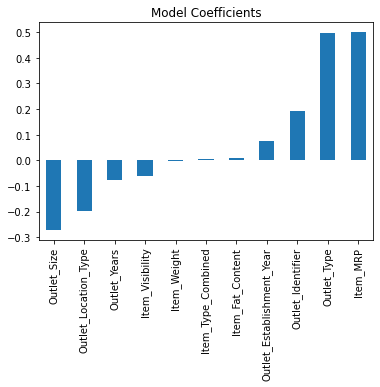

In [95]:
# Checking the important features
coef = pd.Series(rr.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

### Decision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)
y_pred_dt= dt.predict(X_test)

In [97]:
y_pred_dt

array([7.23791506, 7.92638467, 8.04588913, ..., 7.71516053, 4.72609849,
       6.87496511])

In [98]:
print('MSE : ', mean_squared_error(y_test,y_pred_dt))
print('MAE : ', mean_absolute_error(y_test,y_pred_dt))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print('r2 score:', r2_score(y_test,y_pred_dt))

MSE :  0.5397899272434123
MAE :  0.5654542297812659
RMSE :  0.7347039725245892
r2 score: 0.45770779107644144


<AxesSubplot:title={'center':'Feature Importance'}>

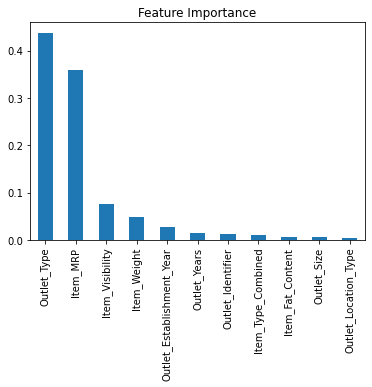

In [99]:
# Checking the important features
coef = pd.Series(dt.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

### Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [101]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
y_pred_rf= rf.predict(X_test)

In [103]:
y_pred

array([8.49878788, 7.76919307, 7.78446271, ..., 7.34450281, 5.52925033,
       7.34699289])

In [104]:
print('MAE:', mean_absolute_error(y_test,y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('r2_score:', r2_score(y_test,y_pred_rf))

MAE: 0.4290284166665105
RMSE: 0.5470023945743587
r2_score: 0.6994013374886203


<AxesSubplot:title={'center':'Feature Importance'}>

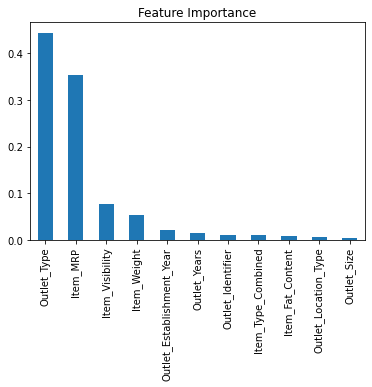

In [105]:
# Checking the important features
coef = pd.Series(rf.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

### XGBoost Regressor

In [106]:
from xgboost import XGBRegressor

In [107]:
xgb = XGBRegressor()

xgb.fit(X_train,y_train)
y_pred_xgb= xgb.predict(X_test)

In [108]:
y_pred_xgb

array([7.747317 , 8.02352  , 7.453556 , ..., 7.4241986, 4.9762793,
       6.720248 ], dtype=float32)

In [109]:
print('MAE:', mean_absolute_error(y_test,y_pred_xgb))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print('r2_score:', r2_score(y_test,y_pred_xgb))

MAE: 0.42507191171624825
RMSE: 0.5511337236619662
r2_score: 0.6948435449240279


<AxesSubplot:title={'center':'Feature Importance'}>

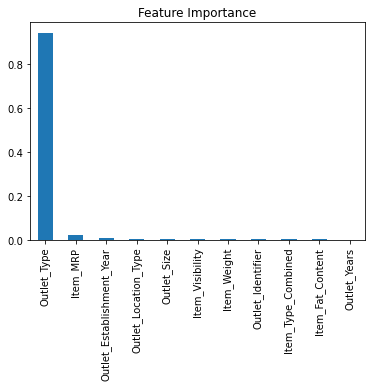

In [110]:
# Checking the important features
coef = pd.Series(xgb.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

### Extra Tree Regressor

In [111]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()

et.fit(X_train,y_train)
y_pred_et= et.predict(X_test)

In [112]:
y_pred_et

array([7.82333494, 7.76051664, 7.50476138, ..., 7.49919036, 5.2213672 ,
       6.8635168 ])

In [113]:
print('MAE:', mean_absolute_error(y_test,y_pred_et))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_et)))
print('r2_score:', r2_score(y_test,y_pred_et))

MAE: 0.43518440612208126
RMSE: 0.5602264299735322
r2_score: 0.6846914288545747


<AxesSubplot:title={'center':'Feature Importance'}>

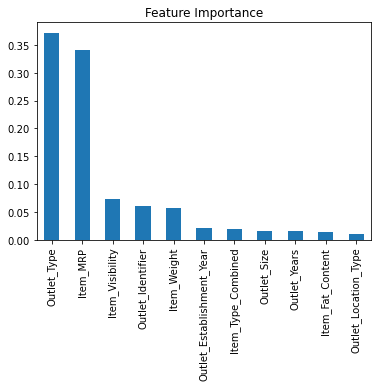

In [114]:
# Checking the important features
coef = pd.Series(et.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

### AdaBoost Regressor

In [115]:
from sklearn.ensemble import AdaBoostRegressor

In [116]:
abr = AdaBoostRegressor()

abr.fit(X_train,y_train)
y_pred_abr= abr.predict(X_test)

In [117]:
y_pred_abr

array([7.84922554, 7.84922554, 7.36559641, ..., 7.36559641, 4.94023159,
       7.0488853 ])

In [118]:
print('MAE:', mean_absolute_error(y_test,y_pred_abr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_abr)))
print('r2_score:', r2_score(y_test,y_pred_abr))

MAE: 0.44710364788430673
RMSE: 0.5484960702848549
r2_score: 0.6977574326228726


<AxesSubplot:title={'center':'Feature Importance'}>

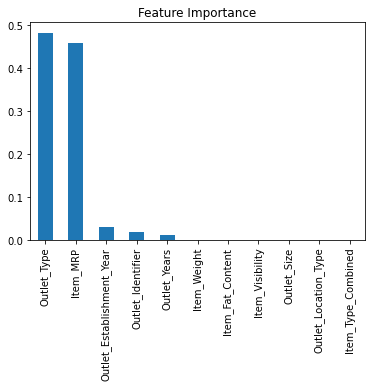

In [119]:
# Checking the important features
coef = pd.Series(abr.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

### Support Vector Regressor

In [120]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train,y_train)
y_pred_svr= svr.predict(X_test)

In [121]:
y_pred_svr

array([7.92352866, 8.07366097, 7.57295657, ..., 7.45319117, 4.90969353,
       6.90980476])

In [122]:
print('MAE:', mean_absolute_error(y_test,y_pred_svr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print('r2_score:', r2_score(y_test,y_pred_svr))

MAE: 0.40111488555297325
RMSE: 0.5266525697191108
r2_score: 0.7213513110312778


### KNN Regressor

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [124]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)
y_pred_knn= knn.predict(X_test)

In [125]:
y_pred_knn

array([7.99227685, 7.8515029 , 7.80934598, ..., 7.31749521, 4.95065283,
       7.37490647])

In [126]:
print('MAE:', mean_absolute_error(y_test,y_pred_knn))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print('r2_score:', r2_score(y_test,y_pred_knn))

MAE: 0.45495841332111847
RMSE: 0.5790896678782697
r2_score: 0.6631006124350637


### Save the model

In [127]:
import joblib

In [128]:
joblib.dump(svr,r'C:\Users\user\Desktop\Hackathon_Assignment\SVR Regressor.sav')

['C:\\Users\\user\\Desktop\\Hackathon_Assignment\\SVR Regressor.sav']

In [129]:
model=joblib.load(r'C:\Users\user\Desktop\Hackathon_Assignment\SVR Regressor.sav')

In [130]:
model.predict(X_test)

array([7.92352866, 8.07366097, 7.57295657, ..., 7.45319117, 4.90969353,
       6.90980476])